# Librería Geopandas: 
Es la librería de Python para trabajar con datos geoespaciales aprovechando también las ventajas de Pandas.

https://geopandas.org/en/stable/docs.html

### Instalación

In [1]:
%pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 2.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 5.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 8.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 6.1 MB/s eta 0:00:0000:01:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import geopandas as gpd

In [3]:
# Otras libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

### Importar archivo de datos con geometrías

In [5]:
# Importar datos con geometrías
fp = "/home/unixx/linear_regression/15.Geopandas/Datos/London_Borough_Excluding_MHW.shp"
data = gpd.read_file(fp)

In [5]:
data.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [6]:
data.tail(5)

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
28,Hackney,E09000012,1904.902,0.000,T,None,None,"POLYGON ((531928.4 187801.5, 531935.7 187804.4..."
29,Haringey,E09000014,2959.837,0.000,T,None,None,"POLYGON ((531928.4 187801.5, 531919.2 187797.3..."
30,Newham,E09000025,3857.806,237.637,T,None,None,"MULTIPOLYGON (((544065 183254.1, 544062.9 1832..."
31,Barking and Dagenham,E09000002,3779.934,169.150,F,None,None,"MULTIPOLYGON (((543905.4 183199.1, 543905 1831..."
32,City of London,E09000001,314.942,24.546,T,None,None,"POLYGON ((531145.1 180782.1, 531143.8 180799.3..."


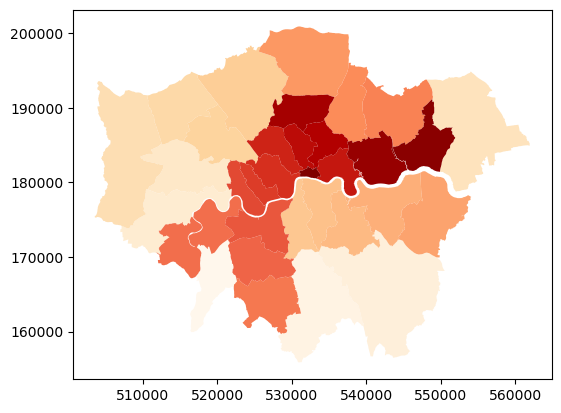

In [7]:
# Como se ve en un plot
plot = data.plot(cmap='OrRd')
fig = plot.get_figure()

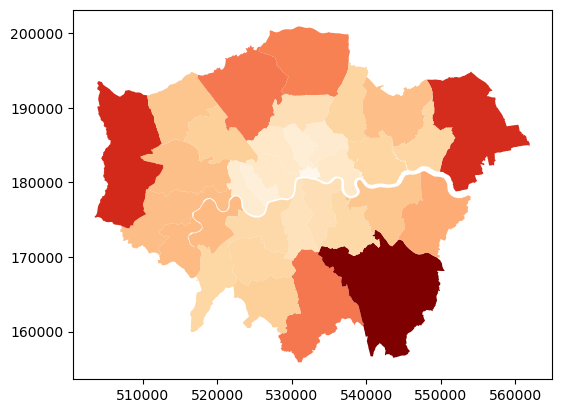

In [8]:
plot = data.plot(column="HECTARES",cmap='OrRd')
fig = plot.get_figure()

In [10]:
# Importar con Pandas los nuevos datos con información para cada área
df = pd.read_csv("/home/unixx/linear_regression/15.Geopandas/Datos/MPS_Borough_Level_Crime_Historic.csv", header=0, encoding="utf-8") 
df.head(3)

,borough,major_category,minor_category,200801,200802,200803,200804,200805,200806,200807,...,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612
0,Barking and Dagenham,Burglary,Burglary in a Dwelling,82,71,87,74,74,103,113,...,73,47,77,63,55,54,49,60,73,100
1,Barking and Dagenham,Burglary,Burglary in Other Buildings,59,68,56,53,57,39,44,...,32,42,42,47,32,33,45,40,24,19
2,Barking and Dagenham,Criminal Damage,Criminal Damage To Dwelling,79,52,55,73,63,80,73,...,50,36,58,30,48,38,31,29,32,26


### Manejo de datos geoespaciales

In [11]:
df.major_category.unique()

array(['Burglary', 'Criminal Damage', 'Drugs', 'Fraud or Forgery',
       'Other Notifiable Offences', 'Robbery', 'Sexual Offences',
       'Theft and Handling', 'Violence Against the Person'], dtype=object)

In [12]:
# Filtro: incluir solo los datos cuya  'major category' = 'Violence Against the Person':

filtered = df['major_category'] == 'Violence Against the Person'
violence = df[filtered] # nuevo dataset filtrado
violence



,borough,major_category,minor_category,200801,200802,200803,200804,200805,200806,200807,...,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612
25,Barking and Dagenham,Violence Against the Person,Assault with Injury,180,121,171,164,162,145,175,...,108,100,136,143,146,106,126,104,108,95
26,Barking and Dagenham,Violence Against the Person,Common Assault,99,86,101,85,90,115,100,...,167,134,144,140,161,122,140,116,142,112
27,Barking and Dagenham,Violence Against the Person,Grievous Bodily Harm,0,0,6,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,Barking and Dagenham,Violence Against the Person,Harassment,129,108,115,107,124,150,140,...,186,147,173,166,192,194,145,145,137,145
29,Barking and Dagenham,Violence Against the Person,Murder,0,0,0,1,0,0,0,...,0,0,0,1,0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,Westminster,Violence Against the Person,Harassment,207,191,187,185,233,223,259,...,249,261,275,300,404,339,342,323,296,297
1052,Westminster,Violence Against the Person,Murder,0,1,2,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1053,Westminster,Violence Against the Person,Offensive Weapon,27,20,22,21,24,37,39,...,26,18,23,25,21,44,19,34,22,22
1054,Westminster,Violence Against the Person,Other violence,38,25,32,24,22,42,61,...,52,57,48,47,53,47,59,39,59,49


In [13]:
df.shape

(1056, 111)

In [14]:
# Agrupar con groupby, usando la suma de los valores de cada área:
df_new = violence.groupby('borough').sum()
df_new.head() # nuevo dataset con información para cada área

,major_category,minor_category,200801,200802,200803,200804,200805,200806,200807,200808,...,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612
borough,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,Violence Against the PersonViolence Against th...,Assault with InjuryCommon AssaultGrievous Bodi...,449,366,415,415,425,485,485,481,...,557,475,572,546,617,522,518,447,500,465
Barnet,Violence Against the PersonViolence Against th...,Assault with InjuryCommon AssaultGrievous Bodi...,385,386,413,429,524,475,516,383,...,576,634,711,677,666,661,658,677,613,598
Bexley,Violence Against the PersonViolence Against th...,Assault with InjuryCommon AssaultGrievous Bodi...,238,301,286,279,294,299,281,265,...,405,314,369,398,424,342,390,413,411,396
Brent,Violence Against the PersonViolence Against th...,Assault with InjuryCommon AssaultGrievous Bodi...,443,423,504,518,599,550,588,489,...,684,785,865,839,787,780,768,817,736,777
Bromley,Violence Against the PersonViolence Against th...,Assault with InjuryCommon AssaultGrievous Bodi...,454,413,470,419,473,446,585,469,...,529,481,569,558,627,523,543,606,559,607


In [15]:
data.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


In [16]:
# Unir con el geodataframe 
merged = data.set_index('NAME').join(df_new)

merged = merged.reindex(merged.index.rename('borough'))



In [17]:
merged.head(2)

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,major_category,minor_category,200801,...,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612
borough,,,,,,,,,,,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",Violence Against the PersonViolence Against th...,Assault with InjuryCommon AssaultGrievous Bodi...,191.0,...,228.0,278.0,262.0,268.0,281.0,278.0,296.0,259.0,247.0,296.0
Croydon,E09000008,8649.441,0.0,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",Violence Against the PersonViolence Against th...,Assault with InjuryCommon AssaultGrievous Bodi...,561.0,...,784.0,827.0,954.0,910.0,1021.0,914.0,891.0,904.0,873.0,862.0


### Creación de un mapa

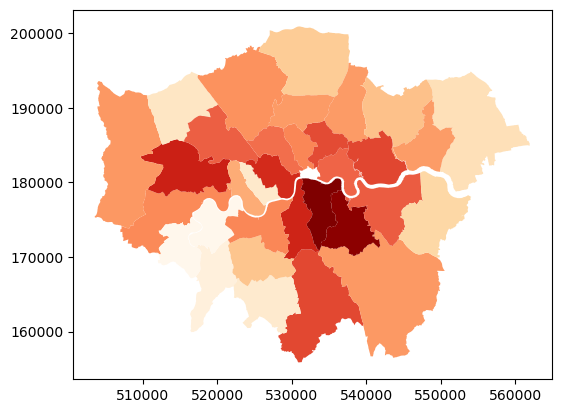

In [18]:
# Plot 2008
plot = merged.plot(column='200804', cmap='OrRd')
fig = plot.get_figure()

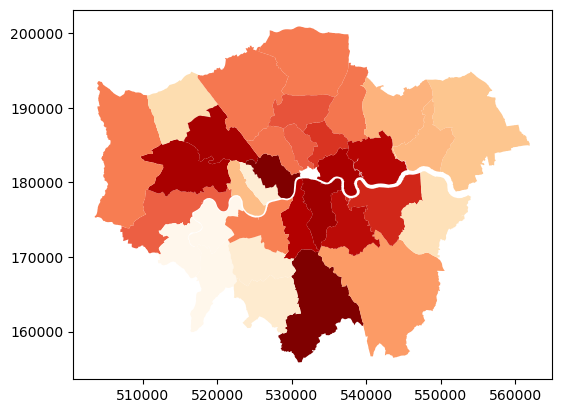

In [19]:
# Plot 2016
plot = merged.plot(column='201601', cmap='OrRd')
fig = plot.get_figure()

### Creación de un GIF con todas las imágenes

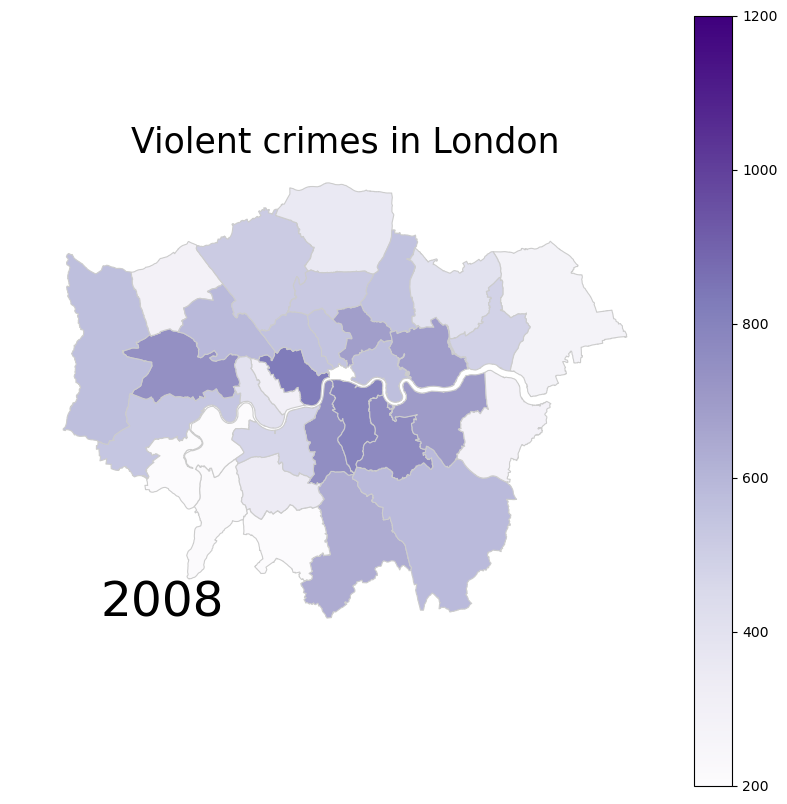

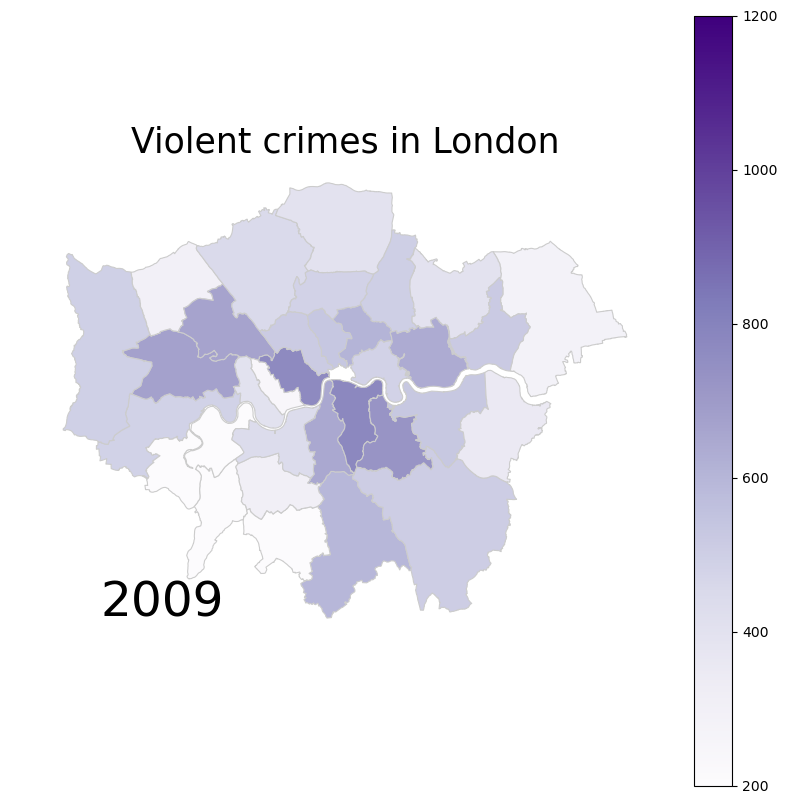

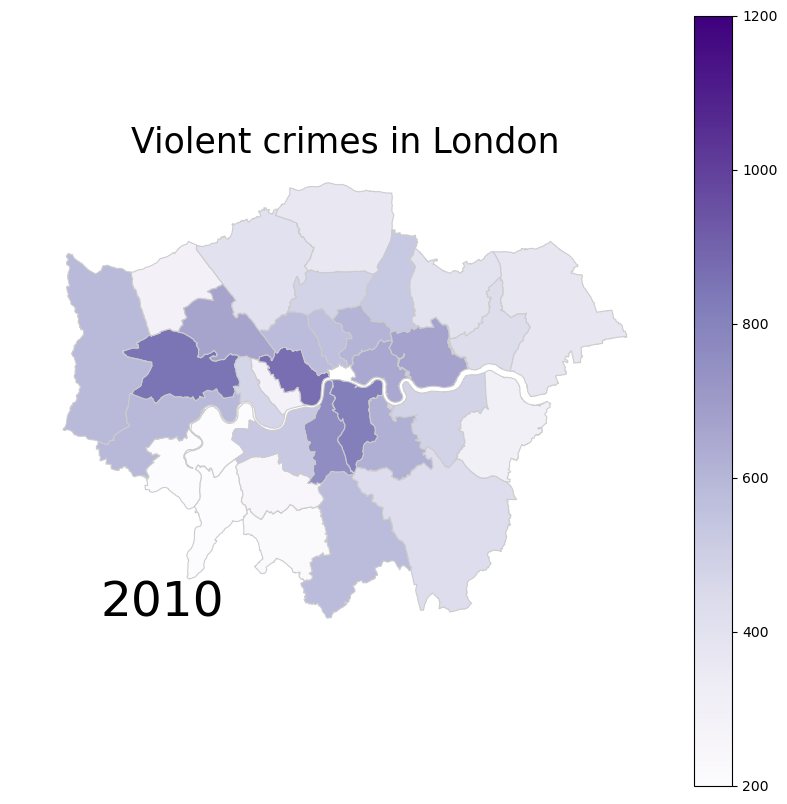

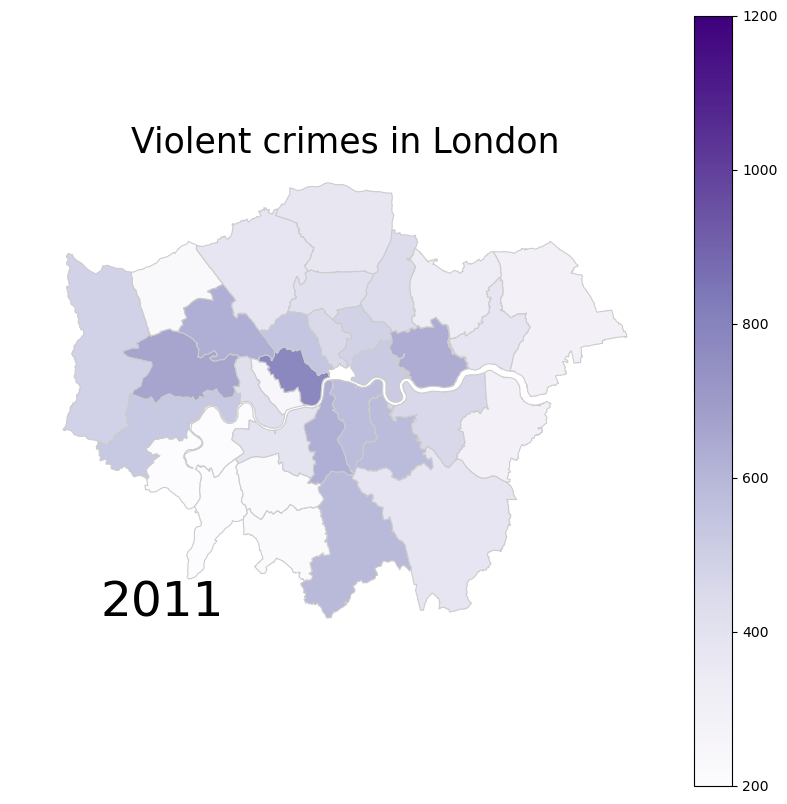

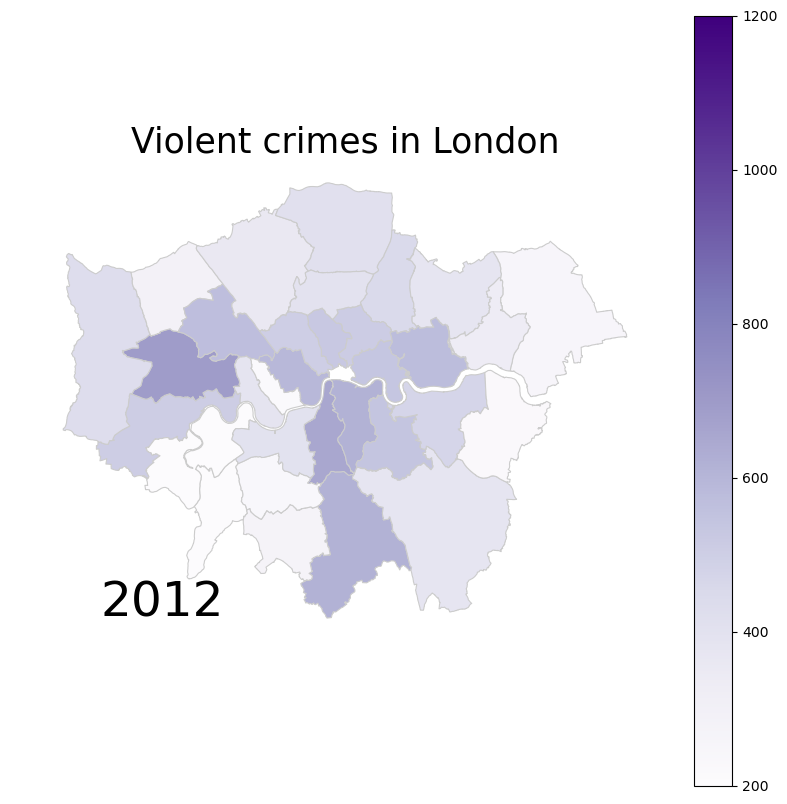

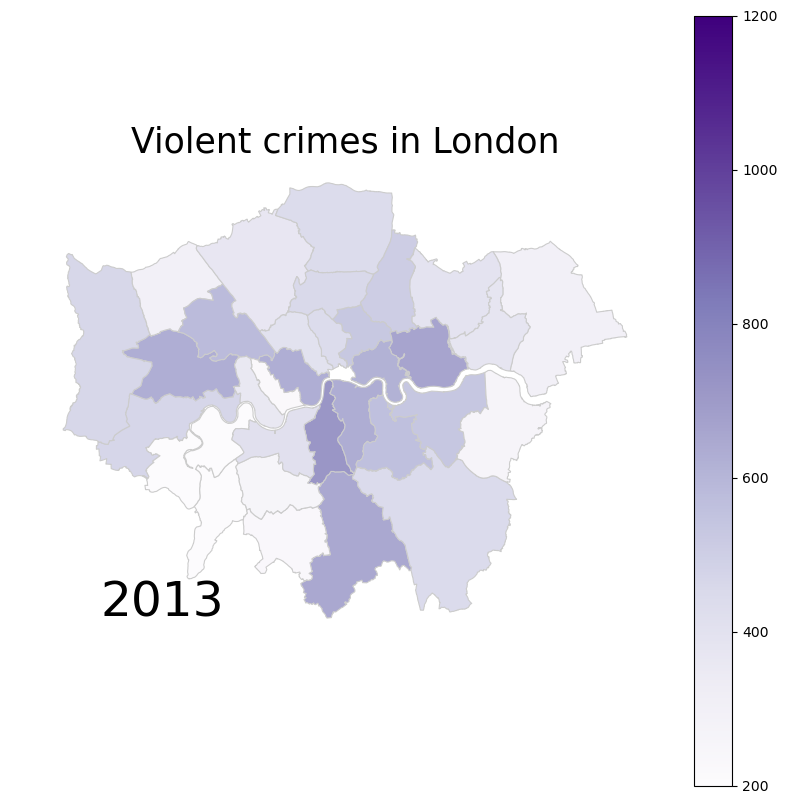

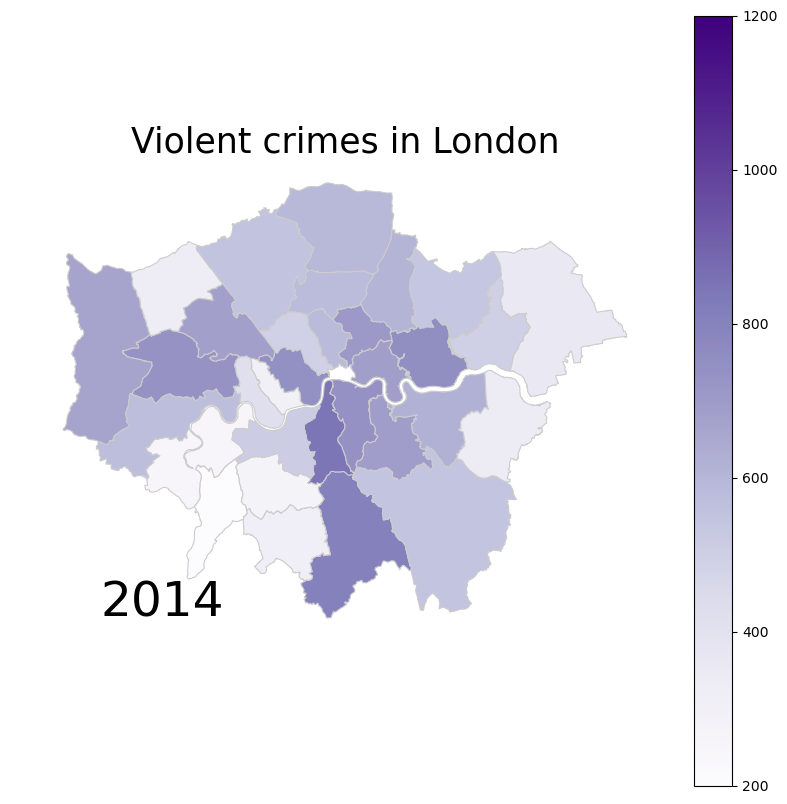

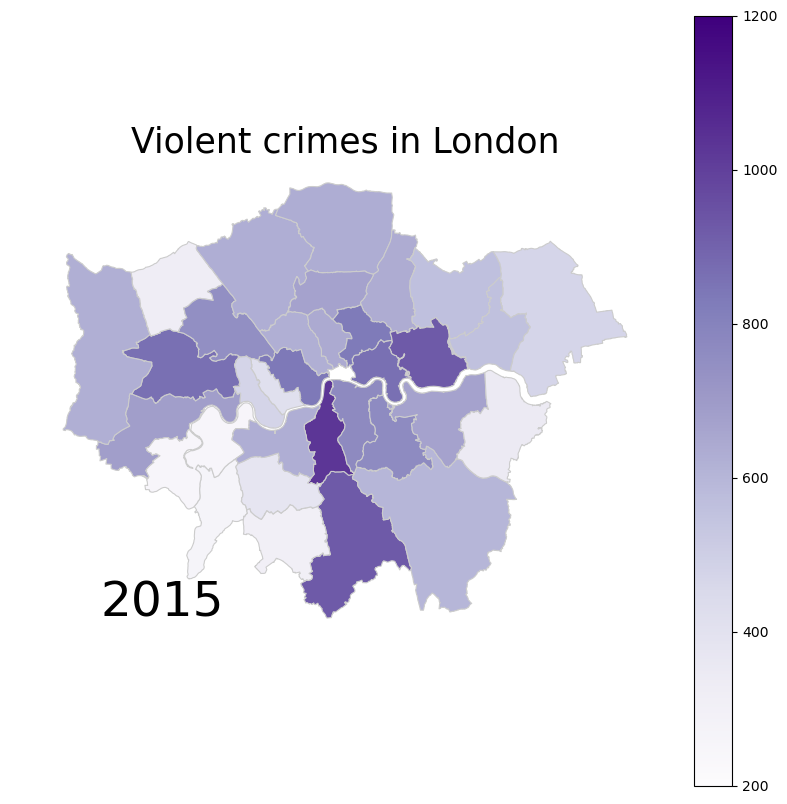

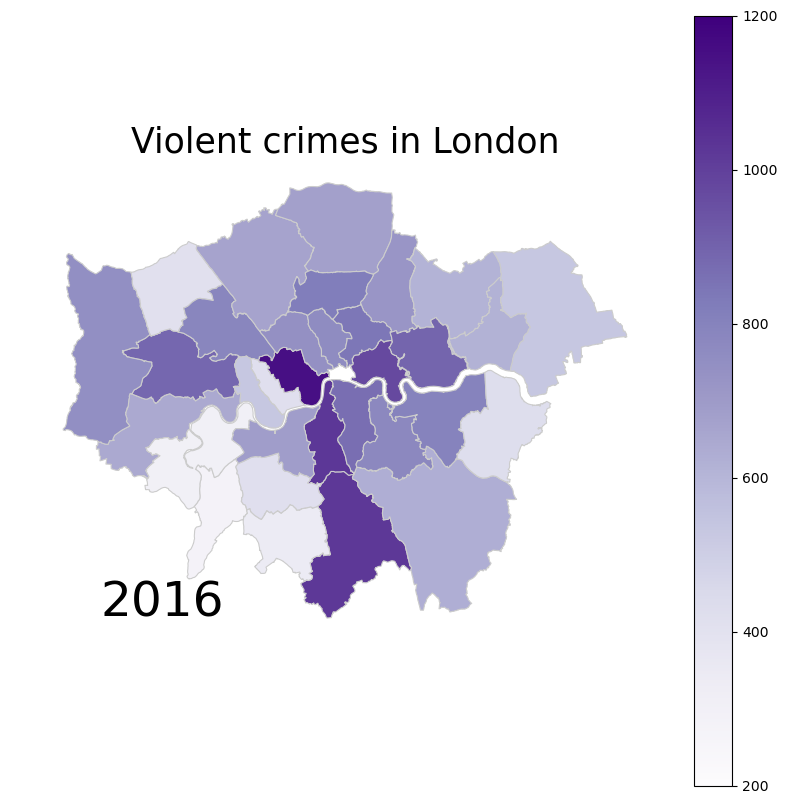

In [22]:
# Crear un gif que contenga múltiples mapas (uno para cada fecha)

output_path = 'maps' #hay que tener creada la carpeta para el output

# contador para el bucle
i = 0

# lista de años 
list_of_years = ['200807','200907','201007','201107','201207','201307','201407','201507','201607']

# rango mínimo y máximo para el mapa
vmin, vmax = 200, 1200

# bucle para crear un mapa por año 2008/07 - 2016/07
for year in list_of_years:
    
    # crear el mapa
    fig = merged.plot(column=year, cmap='Purples', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, 
                       legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax)) 
    
    # remover los valores en los ejes
    fig.axis('off')
    
    # añadir título
    fig.set_title('Violent crimes in London', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # crear una nota para indicar la fecha (el año por ejemplo)
    only_year = year[:4]
    
    # posición de la nota
    fig.annotate(only_year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    # esto guarda las figuras como png 
    filepath = os.path.join(output_path, only_year+'_violence.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [1]:
%pip install imageio


Note: you may need to restart the kernel to use updated packages.


In [3]:
import imageio.v2 as imageio
import os

folder = 'maps' 
files = [f"{folder}/{file}" for file in sorted(os.listdir(folder))]

images = [imageio.imread(file) for file in files]
imageio.mimwrite('movie.gif', images, fps=1)